Objective:

With ever growing number of datasets available, the most important skill is ability to query the data available after getting the data. SQL has extensive verbs to query the data. When I decided to practice on the SQL query skills, getting the data is very easy. Starting from 

 - [Kaggle](https://www.kaggle.com/)
 
 - [Observable HQ](http://observablehq.com/)
 
 - [Github Archive](https://archiveprogram.github.com/)
 
 - [Many of the APIs](https://rapidapi.com/hub)
 
 - [Pytube Library](https://pytube.io/en/latest/)
 
 - [Beautiful Soup and Selenium Library](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
    
are some of the sources for good data, and scraping libraries with varying levels of difficulty. So Data is abundant. 

What is Lacking? 

The skill to question the Data that is available. This skill is should not be confused with Exploratory data analysis. Skill to purposefully question the data, and extracting the required insights might need, additional datasets, and more work. 

When I turned to online and search for practice datasets and questions. There are competitions hosted and projects with problem statements shared on websites, for the developers to practice. Most of these services require you to register.     
    

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Starting spark with database connectivity
spark = SparkSession.builder.appName("KPI"). \
            config('spark.jars','/usr/share/java/postgresql-42.2.26.jar'). \
            getOrCreate()
sparkread = spark.read
sparkcon = spark.sparkContext

22/12/07 13:53:31 WARN Utils: Your hostname, codeStation resolves to a loopback address: 127.0.1.1; using 192.168.244.83 instead (on interface wlo1)
22/12/07 13:53:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/12/07 13:53:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
#import the Xls data

mainDS = pd.read_excel("Call Center KPI Dashboard.xlsx",
                       sheet_name="Datasource",
                      header=0)

In [4]:
updateHeader = []

for col in mainDS.columns:
    temp = col.replace(' ','_')
    temp = temp.replace('-','_')
    updateHeader.append(temp)

In [5]:
#When the column headers are referred in SQL, 
#having space in header names will create challenges 
mainDS.columns = updateHeader
mainDS.head()

,Call_Id,Month,Agents,Department,Average_Speed_of_Answer_in_Secs,In_person_visits,Calls_Answered(Y/N),Satisfaction_status,Months_Filter
0,cid1001,2020-01-01,Sali Faith,Production,17.0,10.0,Y,1.0,False
1,cid1002,2020-01-02,Will Fresh,Sales,14.0,39.0,Y,0.0,False
2,cid1003,2020-01-03,Peter Anni,Logistic,22.0,4.0,Y,1.0,False
3,cid1004,2020-01-04,Mumin Yusha,Sales,24.0,5.0,Y,1.0,False
4,cid1005,2020-01-05,Freda Grek,Logistic,14.0,0.0,y,1.0,False


In [104]:
mainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Call_Id                          649 non-null    object        
 1   Month                            649 non-null    datetime64[ns]
 2   Agents                           649 non-null    object        
 3   Department                       649 non-null    object        
 4   Average_Speed_of_Answer_in_Secs  467 non-null    float64       
 5   In_person_visits                 627 non-null    float64       
 6   Calls_Answered(Y/N)              649 non-null    object        
 7   Satisfaction_status              467 non-null    float64       
 8   Months_Filter                    649 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(4)
memory usage: 41.3+ KB


In [105]:
mainDS[mainDS.In_person_visits.isna()].head(3)

,Call_Id,Month,Agents,Department,Average_Speed_of_Answer_in_Secs,In_person_visits,Calls_Answered(Y/N),Satisfaction_status,Months_Filter
36,cid1037,2020-02-06,Will Fresh,Sales,31.0,NaN,Y,1.0,True
80,cid1081,2020-03-21,Sali Faith,Production,106.0,NaN,Y,1.0,False
102,cid1103,2020-04-12,Peter Anni,Logistic,29.0,NaN,Y,1.0,False


In [11]:
mainDS[mainDS.Average_Speed_of_Answer_in_Secs.isna()].head(2)

,Call_Id,Month,Agents,Department,Average_Speed_of_Answer_in_Secs,In_person_visits,Calls_Answered(Y/N),Satisfaction_status,Months_Filter
6,cid1007,2020-01-07,Will Fresh,Sales,NaN,4.0,N,NaN,False
7,cid1008,2020-01-08,Peter Anni,Logistic,NaN,2.0,N,NaN,False


In [6]:
mainDS.columns

Index(['Call_Id', 'Month', 'Agents', 'Department',
       'Average_Speed_of_Answer_in_Secs', 'In_person_visits',
       'Calls_Answered(Y/N)', 'Satisfaction_status', 'Months_Filter'],
      dtype='object')

In [7]:
mainDStruncated = mainDS[['Call_Id', 'Month', 'Agents', 'Department',
       'Satisfaction_status', 'Months_Filter']]

In [8]:
unanswered = mainDS[mainDS['Calls_Answered(Y/N)'] == 'N']

In [9]:
mainDS = mainDS[mainDS['Calls_Answered(Y/N)'] != 'N'].dropna(axis=0)

In [10]:
mainDS[mainDS['Calls_Answered(Y/N)'] != 'Y'].head(2)

,Call_Id,Month,Agents,Department,Average_Speed_of_Answer_in_Secs,In_person_visits,Calls_Answered(Y/N),Satisfaction_status,Months_Filter
4,cid1005,2020-01-05,Freda Grek,Logistic,14.0,0.0,y,1.0,False
22,cid1023,2020-01-23,Peter Anni,Logistic,29.0,10.0,y,0.0,False


In [11]:
mainDS.to_csv("callCenter_Kpi.csv")

In [ ]:
temp = sparkread.csv()

In [53]:
#Moving the dataframe to Pyspark
mainDF = spark.createDataFrame(mainDS)
mainDF.select("*").show(2)

+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
|Call_Id|              Month|    Agents|Department|Average_Speed_of_Answer_in_Secs|In_person_visits|Calls_Answered(Y/N)|Satisfaction_status|Months_Filter|
+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
|cid1001|2020-01-01 00:00:00|Sali Faith|Production|                           17.0|            10.0|                  Y|                1.0|        false|
|cid1002|2020-01-02 00:00:00|Will Fresh|     Sales|                           14.0|            39.0|                  Y|                0.0|        false|
+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
only showing top 2 rows



In [54]:
#Moving the dataframe to Pyspark
unansweredDF = spark.createDataFrame(unanswered)
unansweredDF.select("*").show(2)

+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
|Call_Id|              Month|    Agents|Department|Average_Speed_of_Answer_in_Secs|In_person_visits|Calls_Answered(Y/N)|Satisfaction_status|Months_Filter|
+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
|cid1007|2020-01-07 00:00:00|Will Fresh|     Sales|                            NaN|             4.0|                  N|                NaN|        false|
|cid1008|2020-01-08 00:00:00|Peter Anni|  Logistic|                            NaN|             2.0|                  N|                NaN|        false|
+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
only showing top 2 rows



In [108]:
#Moving the dataframe to Pyspark
mainDFtrunc = spark.createDataFrame(mainDStruncated)
mainDFtrunc.select("*").show(2)

+-------+-------------------+----------+----------+-------------------+-------------+
|Call_Id|              Month|    Agents|Department|Satisfaction_status|Months_Filter|
+-------+-------------------+----------+----------+-------------------+-------------+
|cid1001|2020-01-01 00:00:00|Sali Faith|Production|                1.0|        false|
|cid1002|2020-01-02 00:00:00|Will Fresh|     Sales|                0.0|        false|
+-------+-------------------+----------+----------+-------------------+-------------+
only showing top 2 rows



In [14]:
mainDF.printSchema()

root
 |-- Call_Id: string (nullable = true)
 |-- Month: timestamp (nullable = true)
 |-- Agents: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Average_Speed_of_Answer_in_Secs: double (nullable = true)
 |-- In_person_visits: double (nullable = true)
 |-- Calls_Answered(Y/N): string (nullable = true)
 |-- Satisfaction_status: double (nullable = true)
 |-- Months_Filter: boolean (nullable = true)



In [55]:
spark.sql("""CREATE DATABASE IF NOT EXISTS dashboard_wh""")
spark.sql("""USE dashboard_wh""")

DataFrame[]

In [56]:
mainDF.write.saveAsTable("Bpo_Kpi",mode='overwrite')

In [58]:
unansweredDF.write.saveAsTable("bpo_kpi_unans",mode='overwrite')

In [109]:
mainDFtrunc.write.saveAsTable("bpo_kpi_trunc",mode='overwrite')

In [110]:
spark.sql("SHOW TABLES").show()

+------------+-----------------+-----------+
|   namespace|        tableName|isTemporary|
+------------+-----------------+-----------+
|dashboard_wh|          bpo_kpi|      false|
|dashboard_wh|    bpo_kpi_trunc|      false|
|dashboard_wh|    bpo_kpi_unans|      false|
|            |   answered_calls|       true|
|            |  call_data_final|       true|
|            |  data_with_month|       true|
|            |data_without_null|       true|
|            | unans_with_month|       true|
|            | unanswered_calls|       true|
+------------+-----------------+-----------+



The data is ingested into Python environment, and the moved into Spark Session, which is a JVM that has connectivity to Hive/ SQL databases. The ingested data has been written as permanent tables in the Spark database, created above. 

To begin querying the data, there needs to be purpose. In this case, it is to create a Dashboard that looks like below visual. 

Lets get kickin by using the inbuilt sql queries.

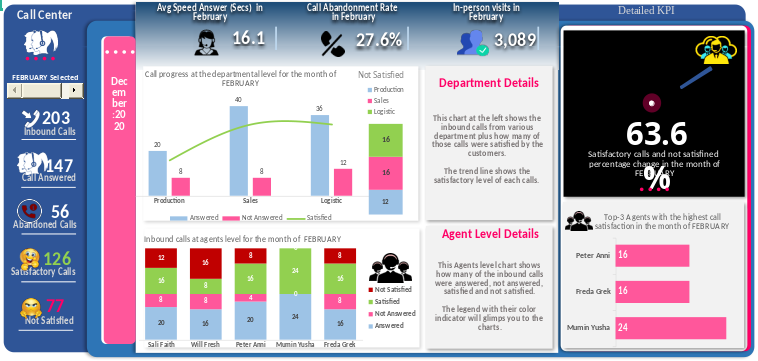

In [60]:
#The dashboard is consolidating based on the months, 
#lets first group the data on month basis

spark.sql("""CREATE OR REPLACE TEMP VIEW data_with_month AS
                SELECT DATE_FORMAT(month, 'MMM') AS month_info, *,
                CASE 
                    WHEN 'Calls_Answered(Y/N)' != 'Y' THEN 1 ELSE 0
                END AS calls_answered
                FROM Bpo_Kpi""")
spark.sql("""SELECT * FROM data_with_month""").show(2)

+----------+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+--------------+
|month_info|Call_Id|              Month|    Agents|Department|Average_Speed_of_Answer_in_Secs|In_person_visits|Calls_Answered(Y/N)|Satisfaction_status|Months_Filter|calls_answered|
+----------+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+--------------+
|       Feb|cid1057|2020-02-26 00:00:00|Will Fresh|     Sales|                           10.0|            70.0|                  Y|                1.0|         true|             1|
|       Feb|cid1058|2020-02-27 00:00:00|Peter Anni|  Logistic|                           13.0|            50.0|                  Y|                1.0|         true|             1|
+----------+-------+-------------------+----------+----------+-------------------------------+-

In [75]:
spark.sql("""CREATE OR REPLACE TEMP VIEW unans_with_month AS
            SELECT DATE_FORMAT(month, 'MMM') as month_info, * 
                FROM bpo_kpi_unans
                """)
spark.sql("""SELECT * FROM unans_with_month""").show(2)

+----------+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
|month_info|Call_Id|              Month|    Agents|Department|Average_Speed_of_Answer_in_Secs|In_person_visits|Calls_Answered(Y/N)|Satisfaction_status|Months_Filter|
+----------+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
|       Jan|cid1007|2020-01-07 00:00:00|Will Fresh|     Sales|                            NaN|             4.0|                  N|                NaN|        false|
|       Jan|cid1008|2020-01-08 00:00:00|Peter Anni|  Logistic|                            NaN|             2.0|                  N|                NaN|        false|
+----------+-------+-------------------+----------+----------+-------------------------------+----------------+-------------------+-------------------+-------------+
only

In [111]:
spark.sql("""CREATE OR REPLACE TEMP VIEW data_trunc_month AS
            SELECT DATE_FORMAT(month, 'MMM') as month_info, * 
                FROM bpo_kpi_trunc
                """)
spark.sql("""SELECT * FROM data_trunc_month""").show(2)

+----------+-------+-------------------+----------+----------+-------------------+-------------+
|month_info|Call_Id|              Month|    Agents|Department|Satisfaction_status|Months_Filter|
+----------+-------+-------------------+----------+----------+-------------------+-------------+
|       Feb|cid1057|2020-02-26 00:00:00|Will Fresh|     Sales|                1.0|         true|
|       Feb|cid1058|2020-02-27 00:00:00|Peter Anni|  Logistic|                1.0|         true|
+----------+-------+-------------------+----------+----------+-------------------+-------------+
only showing top 2 rows



In [96]:
spark.sql("""CREATE OR REPLACE TEMP VIEW unanswered_calls AS
            SELECT month_info, COUNT(In_person_visits) as unanswered,
            Satisfaction_status
                FROM unans_with_month
                GROUP BY month_info, Satisfaction_status
                """)
spark.sql("""SELECT * FROM unanswered_calls""").show()

+----------+----------+-------------------+
|month_info|unanswered|Satisfaction_status|
+----------+----------+-------------------+
|       Jan|        28|                NaN|
|       Feb|        56|                NaN|
|       Mar|        70|                NaN|
|       Apr|        28|                NaN|
+----------+----------+-------------------+



In [97]:
spark.sql("""CREATE OR REPLACE TEMP VIEW answered_calls AS
            SELECT ROUND(AVG(Average_Speed_of_Answer_in_Secs),2) 
                            AS avg_answer_speed,
                    SUM(In_person_visits) as total_visits,
                    SUM(calls_answered) as callsrecieved,
                    month_info,Satisfaction_status
                    FROM data_with_month 
                    GROUP BY month_info, Satisfaction_status
                    ORDER BY AVG(Average_Speed_of_Answer_in_Secs)
                    """)
spark.sql("""SELECT * FROM answered_calls""").show()

+----------------+------------+-------------+----------+-------------------+
|avg_answer_speed|total_visits|callsrecieved|month_info|Satisfaction_status|
+----------------+------------+-------------+----------+-------------------+
|           16.67|       328.0|           21|       Feb|                0.0|
|           17.25|       264.0|           16|       Jan|                0.0|
|           19.14|      1207.0|           77|       Jan|                1.0|
|           22.98|      1903.0|          122|       Feb|                1.0|
|           25.91|       390.0|           23|       Mar|                0.0|
|           26.55|       842.0|           64|       Apr|                1.0|
|           30.55|       214.0|           11|       Apr|                0.0|
|           31.92|      1503.0|          119|       Mar|                1.0|
+----------------+------------+-------------+----------+-------------------+



In [117]:
spark.sql("""CREATE OR REPLACE TEMP VIEW call_data_final_table AS
            SELECT u.month_info, u.unanswered,a.callsrecieved,
                    a.total_visits,a.avg_answer_speed,
                    a.callsrecieved + u.unanswered AS inboundCalls,
                    ROUND(u.unanswered * 100/(a.callsrecieved + u.unanswered),1) AS abandonmentPC,
                    a.Satisfaction_status
                    FROM answered_calls AS a
                    JOIN unanswered_calls as u
                    ON a.month_info = u.month_info
                    """)
spark.sql("""SELECT * FROM call_data_final_table""").show(truncate=True)

+----------+----------+-------------+------------+----------------+------------+-------------+-------------------+
|month_info|unanswered|callsrecieved|total_visits|avg_answer_speed|inboundCalls|abandonmentPC|Satisfaction_status|
+----------+----------+-------------+------------+----------------+------------+-------------+-------------------+
|       Jan|        28|           16|       264.0|           17.25|          44|         63.6|                0.0|
|       Jan|        28|           77|      1207.0|           19.14|         105|         26.7|                1.0|
|       Feb|        56|           21|       328.0|           16.67|          77|         72.7|                0.0|
|       Feb|        56|          122|      1903.0|           22.98|         178|         31.5|                1.0|
|       Mar|        70|          119|      1503.0|           31.92|         189|         37.0|                1.0|
|       Mar|        70|           23|       390.0|           25.91|          93|

In [116]:
spark.sql("""CREATE OR REPLACE TEMP VIEW call_progress_table AS
            SELECT COUNT(*) as callCounts, Satisfaction_status, Department,
                    Agents, month_info
                FROM data_trunc_month
                GROUP BY Satisfaction_status, Department,
                    Agents, month_info""")
spark.sql("""SELECT * FROM call_progress_table""").show()

+----------+-------------------+----------+-----------+----------+
|callCounts|Satisfaction_status|Department|     Agents|month_info|
+----------+-------------------+----------+-----------+----------+
|         8|                0.0|     Sales| Will Fresh|       Jan|
|        21|                1.0|Production| Sali Faith|       Feb|
|         7|                0.0|  Logistic| Peter Anni|       Feb|
|         7|                NaN|Production| Sali Faith|       Feb|
|         7|                NaN|     Sales| Will Fresh|       Apr|
|         7|                NaN|  Logistic| Freda Grek|       Apr|
|        20|                1.0|     Sales|Mumin Yusha|       Apr|
|        14|                NaN|     Sales| Will Fresh|       Mar|
|         4|                0.0|Production| Sali Faith|       Jan|
|         5|                0.0|  Logistic| Peter Anni|       Apr|
|        21|                1.0|     Sales|Mumin Yusha|       Mar|
|         9|                1.0|  Logistic| Peter Anni|       

In [119]:
spark.sql("SHOW TABLES").show(truncate=False)

+------------+---------------------+-----------+
|namespace   |tableName            |isTemporary|
+------------+---------------------+-----------+
|dashboard_wh|bpo_kpi              |false      |
|dashboard_wh|bpo_kpi_trunc        |false      |
|dashboard_wh|bpo_kpi_unans        |false      |
|            |answered_calls       |true       |
|            |call_data_final      |true       |
|            |call_data_final_table|true       |
|            |call_progress_table  |true       |
|            |data_trunc_month     |true       |
|            |data_with_month      |true       |
|            |data_without_null    |true       |
|            |unans_with_month     |true       |
|            |unanswered_calls     |true       |
+------------+---------------------+-----------+

